# 3. Análise Exploratória dos Dados

In [2]:
import os

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder



In [3]:
df = pd.read_csv('../dataset/dados_tratados.csv')
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_width_cm,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,delivery_time,customer_state_encoded,seller_state_encoded,product_category_name_encoded
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,13.0,3149.0,-23.574809,-46.587471,sao paulo,SP,8,25,21,72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,...,19.0,47813.0,-12.169860,-44.988369,barreiras,BA,13,4,21,62
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,21.0,75265.0,-16.746337,-48.514624,vianopolis,GO,9,8,21,8
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,...,20.0,59296.0,-5.767733,-35.275467,sao goncalo do amarante,RN,13,19,7,63
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,...,15.0,9195.0,-23.675037,-46.524784,santo andre,SP,2,25,21,59


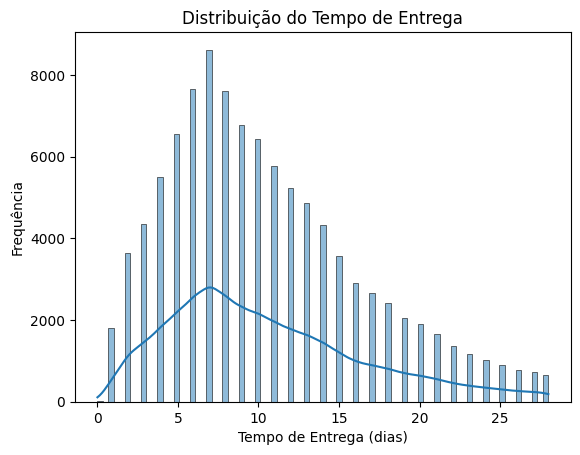

In [4]:
sns.histplot(df['delivery_time'], kde=True)
plt.title('Distribuição do Tempo de Entrega')
plt.xlabel('Tempo de Entrega (dias)')
plt.ylabel('Frequência')
plt.show()

In [5]:
df['delivery_time'].describe()

count    102901.000000
mean         10.510598
std           6.040345
min           0.000000
25%           6.000000
50%           9.000000
75%          14.000000
max          28.000000
Name: delivery_time, dtype: float64

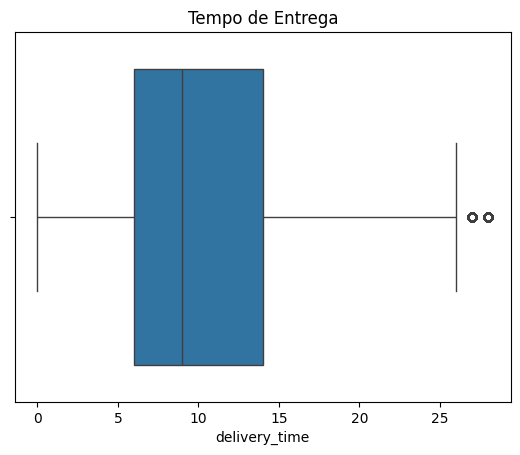

In [6]:
# outliers
sns.boxplot(x=df['delivery_time'])
plt.title('Tempo de Entrega')
plt.show()

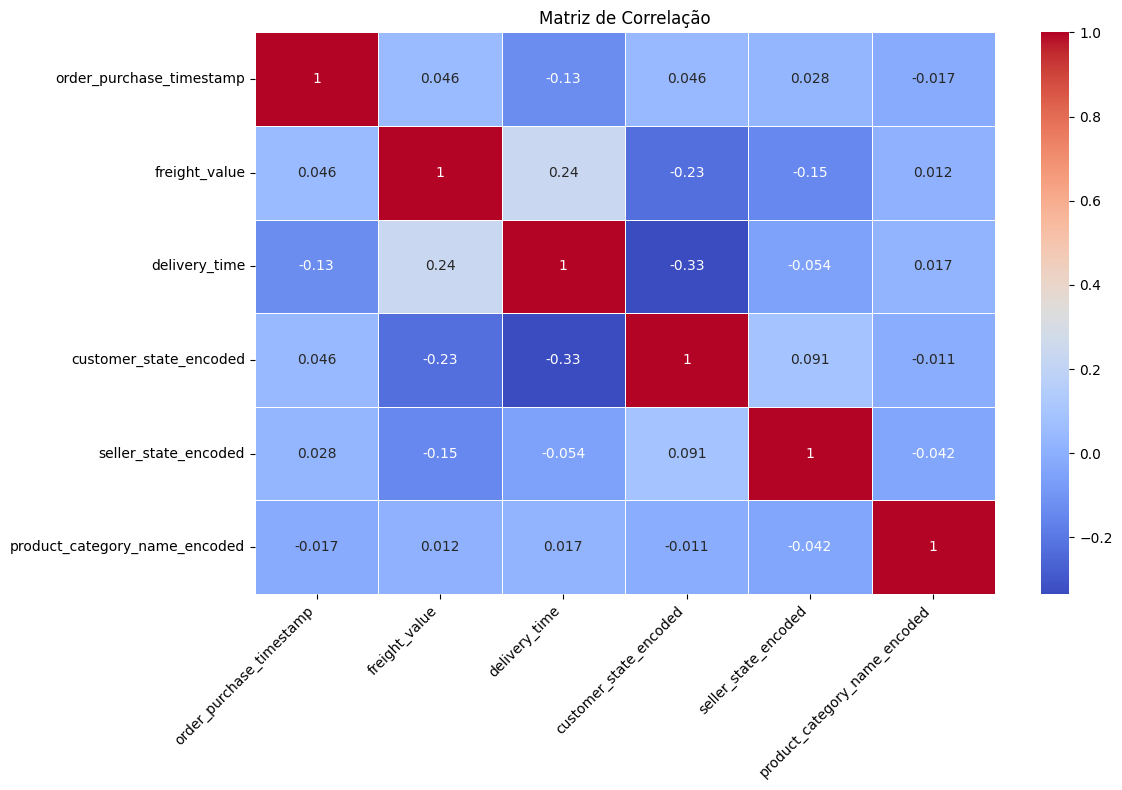

In [7]:

# removendo na mao os dados quantitativos q nao tem relacao ou interesse ao modelo...
correlation_matrix = (
    df
    .select_dtypes(include=['number', 'datetime'])
    .corr()
    .drop('geolocation_lat', axis=0)
    .drop('geolocation_lat', axis=1)
    .drop('geolocation_lng', axis=0)
    .drop('geolocation_lng', axis=1)
    .drop('geolocation_zip_code_prefix', axis=0)
    .drop('geolocation_zip_code_prefix', axis=1)
    .drop('seller_zip_code_prefix', axis=0)
    .drop('seller_zip_code_prefix', axis=1)
    .drop('customer_zip_code_prefix', axis=0)
    .drop('customer_zip_code_prefix', axis=1)
    .drop('order_item_id', axis=0)
    .drop('order_item_id', axis=1)
    .drop('price', axis=0)
    .drop('price', axis=1)
    .drop('product_name_lenght', axis=0)
    .drop('product_name_lenght', axis=1)
    .drop('product_description_lenght', axis=0)
    .drop('product_description_lenght', axis=1)
    .drop('product_photos_qty', axis=0)
    .drop('product_photos_qty', axis=1)
    .drop('product_weight_g', axis=0)
    .drop('product_weight_g', axis=1)
    .drop('product_length_cm', axis=0)
    .drop('product_length_cm', axis=1)
    .drop('product_width_cm', axis=0)
    .drop('product_width_cm', axis=1)
    .drop('product_height_cm', axis=0)
    .drop('product_height_cm', axis=1)
    )

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlação')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()